In [1]:
pip install transformers

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 5.3 MB 5.6 MB/s 
     |████████████████████████████████| 7.6 MB 50.2 MB/s 
     |████████████████████████████████| 163 kB 70.0 MB/s 


In [2]:
import transformers
transformers.__version__

'4.23.0'

In [3]:
import pandas as pd
import numpy as np
import urllib.request
import os
from tqdm import tqdm
import tensorflow as tf
from transformers import BertTokenizer, TFBertModel
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

In [4]:
from transformers import AutoModel, AutoTokenizer

In [5]:
kr_data = pd.read_csv('./drive/MyDrive/newKR.csv')

jp_data = pd.read_csv('./drive/MyDrive/newJPppp.csv')

kr_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40000 entries, 0 to 39999
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   tweet   39900 non-null  object
 1   label   40000 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 625.1+ KB


In [6]:
print('결측값 여부 :',jp_data.isnull().values.any())

jp_data[jp_data['tweet'].isnull()]

결측값 여부 : False


,tweet,label


In [7]:
print('결측값 여부 :',kr_data.isnull().values.any())

kr_data[kr_data['tweet'].isnull()]

결측값 여부 : True


,tweet,label
30047,NaN,0
30125,NaN,0
30268,NaN,0
30455,NaN,0
30679,NaN,0
...,...,...
39318,NaN,0
39594,NaN,0
39713,NaN,0
39843,NaN,0


In [8]:
kr_data[kr_data['label'].isnull()]

,tweet,label


In [9]:
jp_data[jp_data['label'].isnull()]

,tweet,label


In [10]:
kr_data.isnull().sum()

tweet    100
label      0
dtype: int64

In [11]:
jp_data.isnull().sum()

tweet    0
label    0
dtype: int64

In [12]:
kr_data = kr_data.dropna(axis=0)

In [13]:
jp_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39397 entries, 0 to 39396
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   tweet   39397 non-null  object
 1   label   39397 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 615.7+ KB


In [14]:
kr_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 39900 entries, 0 to 39999
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   tweet   39900 non-null  object
 1   label   39900 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 935.2+ KB


v2열의 유니크한 값 : 39127
총 샘플의 수 : 39127


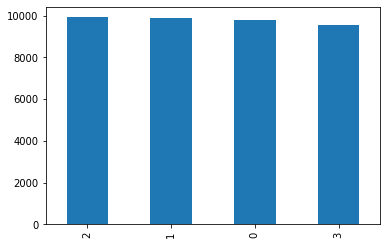

In [15]:
print('v2열의 유니크한 값 :',kr_data['tweet'].nunique())

kr_data.drop_duplicates(subset=['tweet'], inplace=True)

print('총 샘플의 수 :',len(kr_data))

kr_data['label'].value_counts().plot(kind='bar')

v2열의 유니크한 값 : 38523
총 샘플의 수 : 38523


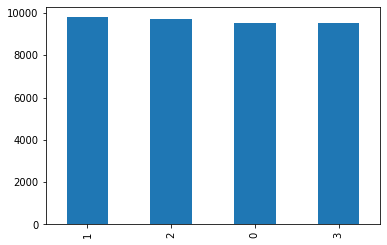

In [16]:
print('v2열의 유니크한 값 :',jp_data['tweet'].nunique())

jp_data.drop_duplicates(subset=['tweet'], inplace=True)

print('총 샘플의 수 :',len(jp_data))

jp_data['label'].value_counts().plot(kind='bar')

In [17]:
x_krdata = kr_data['tweet']
y_krdata = kr_data['label']

print('메일 본문의 개수: {}'.format(len(x_krdata)))
print('레이블의 개수: {}'.format(len(y_krdata)))

X_train, X_test, y_train, y_test = train_test_split(x_krdata, y_krdata, test_size=0.2, random_state=0, stratify=y_krdata)

메일 본문의 개수: 39127
레이블의 개수: 39127


In [18]:
x_jpdata = jp_data['tweet']
y_jpdata = jp_data['label']

print('메일 본문의 개수: {}'.format(len(x_jpdata)))
print('레이블의 개수: {}'.format(len(y_jpdata)))

X_jptrain, X_jptest, y_jptrain, y_jptest = train_test_split(x_jpdata, y_jpdata, test_size=0.2, random_state=0, stratify=y_jpdata)

메일 본문의 개수: 38523
레이블의 개수: 38523


In [19]:
tokenizer = BertTokenizer.from_pretrained('klue/bert-base')

Downloading:   0%|          | 0.00/248k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/125 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/289 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/425 [00:00<?, ?B/s]

In [ ]:
!pip install fugashi[unidic-lite]

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 583 kB 5.1 MB/s 
     |████████████████████████████████| 47.4 MB 1.9 MB/s 
  Created wheel for unidic-lite: filename=unidic_lite-1.0.8-py3-none-any.whl size=47658836 sha256=7459213d5412154153576cbea26af2d2a963a22e4ea2cc23de2fc30244d1de8b
  Stored in directory: /root/.cache/pip/wheels/de/69/b1/112140b599f2b13f609d485a99e357ba68df194d2079c5b1a2
Successfully built unidic-lite


In [ ]:
from fugashi import Tagger
import ipadic

In [ ]:
!pip install ipadic

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 13.4 MB 5.2 MB/s 
  Created wheel for ipadic: filename=ipadic-1.0.0-py3-none-any.whl size=13556723 sha256=62e14e02da94445a2c876d6fec6eeea91a88b19a084700334fbcc0559ec0dd9c
  Stored in directory: /root/.cache/pip/wheels/33/8b/99/cf0d27191876637cd3639a560f93aa982d7855ce826c94348b
Successfully built ipadic


In [ ]:
tokenizer = AutoTokenizer.from_pretrained("cl-tohoku/bert-base-japanese")

Downloading:   0%|          | 0.00/104 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/479 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/258k [00:00<?, ?B/s]

In [20]:
max_seq_len = 256

In [21]:
def convert_examples_to_features(examples, labels, max_seq_len, tokenizer):
    
    input_ids, attention_masks, token_type_ids, data_labels = [], [], [], []
    
    for example, label in tqdm(zip(examples, labels), total=len(examples)):
        input_id = tokenizer.encode(example, max_length=max_seq_len, pad_to_max_length=True)
        padding_count = input_id.count(tokenizer.pad_token_id)
        attention_mask = [1] * (max_seq_len - padding_count) + [0] * padding_count
        token_type_id = [0] * max_seq_len

        assert len(input_id) == max_seq_len, "Error with input length {} vs {}".format(len(input_id), max_seq_len)
        assert len(attention_mask) == max_seq_len, "Error with attention mask length {} vs {}".format(len(attention_mask), max_seq_len)
        assert len(token_type_id) == max_seq_len, "Error with token type length {} vs {}".format(len(token_type_id), max_seq_len)

        input_ids.append(input_id)
        attention_masks.append(attention_mask)
        token_type_ids.append(token_type_id)
        data_labels.append(label)

    input_ids = np.array(input_ids, dtype=int)
    attention_masks = np.array(attention_masks, dtype=int)
    token_type_ids = np.array(token_type_ids, dtype=int)

    data_labels = np.asarray(data_labels, dtype=np.int32)

    return (input_ids, attention_masks, token_type_ids), data_labels

In [ ]:
train_jpX, train_jpy = convert_examples_to_features(X_jptrain, y_jptrain, 
                                                max_seq_len=max_seq_len, tokenizer=tokenizer)

  0%|          | 0/30818 [00:00<?, ?it/s]Truncation was not explicitly activated but `max_length` is provided a specific value, please use `truncation=True` to explicitly truncate examples to max length. Defaulting to 'longest_first' truncation strategy. If you encode pairs of sequences (GLUE-style) with the tokenizer you can select this strategy more precisely by providing a specific strategy to `truncation`.
/usr/local/lib/python3.7/dist-packages/transformers/tokenization_utils_base.py:2308: FutureWarning: The `pad_to_max_length` argument is deprecated and will be removed in a future version, use `padding=True` or `padding='longest'` to pad to the longest sequence in the batch, or use `padding='max_length'` to pad to a max length. In this case, you can give a specific length with `max_length` (e.g. `max_length=45`) or leave max_length to None to pad to the maximal input size of the model (e.g. 512 for Bert).
  FutureWarning,
100%|██████████| 30818/30818 [00:15<00:00, 2034.08it/s]


In [22]:
train_X, train_y = convert_examples_to_features(X_train, y_train, 
                                                max_seq_len=max_seq_len, tokenizer=tokenizer)

  0%|          | 0/31301 [00:00<?, ?it/s]Truncation was not explicitly activated but `max_length` is provided a specific value, please use `truncation=True` to explicitly truncate examples to max length. Defaulting to 'longest_first' truncation strategy. If you encode pairs of sequences (GLUE-style) with the tokenizer you can select this strategy more precisely by providing a specific strategy to `truncation`.
/usr/local/lib/python3.7/dist-packages/transformers/tokenization_utils_base.py:2308: FutureWarning: The `pad_to_max_length` argument is deprecated and will be removed in a future version, use `padding=True` or `padding='longest'` to pad to the longest sequence in the batch, or use `padding='max_length'` to pad to a max length. In this case, you can give a specific length with `max_length` (e.g. `max_length=45`) or leave max_length to None to pad to the maximal input size of the model (e.g. 512 for Bert).
  FutureWarning,
100%|██████████| 31301/31301 [00:17<00:00, 1756.66it/s]


In [ ]:
test_jpX, test_jpy = convert_examples_to_features(X_jptest, y_jptest, 
                                              max_seq_len=max_seq_len, tokenizer=tokenizer)

100%|██████████| 7705/7705 [00:03<00:00, 2036.21it/s]


In [23]:
test_X, test_y = convert_examples_to_features(X_test, y_test, 
                                              max_seq_len=max_seq_len, tokenizer=tokenizer)

100%|██████████| 7826/7826 [00:04<00:00, 1773.68it/s]


In [ ]:
print('정수 인코딩 복원 :',tokenizer.decode(train_jpX[0][2]))

정수 인코딩 복원 : [CLS] 人生 ファイナル ラップ 世間 が 知る 凶悪 事件 の 記述 に 至る まで の 長く 辛く 悲しい 生い立ち 罪人 で ある 前 に 一 人 の 人間 として 助け て もらい たかっ た ね と 声 を かけ たく なる [SEP] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD]


In [ ]:
input_id = train_jpX[0][0]
attention_mask = train_jpX[1][0]
token_type_id = train_jpX[2][0]
label = train_jpy[0]

print('단어에 대한 정수 인코딩 :',input_id)
print('어텐션 마스크 :',attention_mask)
print('세그먼트 인코딩 :',token_type_id)
print('각 인코딩의 길이 :', len(input_id))
print(input_id)
print('정수 인코딩 복원 :',tokenizer.decode(input_id))
print('레이블 :',label)

단어에 대한 정수 인코딩 : [    2    97    52  5648   224 28902   337  8592  1592  1778   265  5648
  6819  2731  2543 23269    12  2501     3     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0]
어텐션 마스크 : [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0

In [24]:
input_id = train_X[0][0]
attention_mask = train_X[1][0]
token_type_id = train_X[2][0]
label = train_y[0]

print('단어에 대한 정수 인코딩 :',input_id)
print('어텐션 마스크 :',attention_mask)
print('세그먼트 인코딩 :',token_type_id)
print('각 인코딩의 길이 :', len(input_id))
print('정수 인코딩 복원 :',tokenizer.decode(input_id))
print('레이블 :',label)

단어에 대한 정수 인코딩 : [    2  1972   900  7485  9989  4167   809 17359  9989  2043  2244  3943
  1378  2172  2886 13964  1595  2917  2470  3884  2775  2346  2170 21646
  2097  2118  2259  2180  1160  2460  4230  6111  2116  9535 31369   566
  8092  2318 31398  4292  1083  2073 10701  2246 19292 12518  2052  1378
  2496  2112   848 11116  2316  2289     3     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     

In [ ]:
model = AutoModel.from_pretrained("cl-tohoku/bert-base-japanese", from_pt=True)

Downloading:   0%|          | 0.00/445M [00:00<?, ?B/s]

Some weights of the model checkpoint at cl-tohoku/bert-base-japanese were not used when initializing BertModel: ['cls.predictions.transform.dense.bias', 'cls.predictions.transform.LayerNorm.bias', 'cls.predictions.bias', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.decoder.weight', 'cls.seq_relationship.weight', 'cls.seq_relationship.bias', 'cls.predictions.transform.dense.weight']
- This IS expected if you are initializing BertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


In [25]:
model = TFBertModel.from_pretrained("klue/bert-base", from_pt=True)

Downloading:   0%|          | 0.00/445M [00:00<?, ?B/s]

Some weights of the PyTorch model were not used when initializing the TF 2.0 model TFBertModel: ['cls.predictions.transform.dense.bias', 'cls.predictions.transform.LayerNorm.bias', 'cls.predictions.decoder.weight', 'cls.predictions.transform.dense.weight', 'cls.predictions.bias', 'cls.predictions.transform.LayerNorm.weight', 'cls.seq_relationship.bias', 'bert.embeddings.position_ids', 'cls.predictions.decoder.bias', 'cls.seq_relationship.weight']
- This IS expected if you are initializing TFBertModel from a PyTorch model trained on another task or with another architecture (e.g. initializing a TFBertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFBertModel from a PyTorch model that you expect to be exactly identical (e.g. initializing a TFBertForSequenceClassification model from a BertForSequenceClassification model).
All the weights of TFBertModel were initialized from the PyTorch model.
If your task is similar to the 

In [26]:
input_ids_layer = tf.keras.layers.Input(shape=(max_seq_len,), dtype=tf.int32)
attention_masks_layer = tf.keras.layers.Input(shape=(max_seq_len,), dtype=tf.int32)
token_type_ids_layer = tf.keras.layers.Input(shape=(max_seq_len,), dtype=tf.int32)

outputs = model([input_ids_layer, attention_masks_layer, token_type_ids_layer])

In [27]:
class TFBertForSequenceClassification(tf.keras.Model):
    def __init__(self, model_name):
        super(TFBertForSequenceClassification, self).__init__()
        self.bert = TFBertModel.from_pretrained(model_name, from_pt=True, num_hidden_layers	=12, hidden_dropout_prob=0.25)
        self.classifier = tf.keras.layers.Dense(4,
                                                kernel_initializer=tf.keras.initializers.TruncatedNormal(0.02),
                                                activation='sigmoid',
                                                name='classifier')

    def call(self, inputs):
        input_ids, attention_mask, token_type_ids = inputs
        outputs = self.bert(input_ids=input_ids, attention_mask=attention_mask, token_type_ids=token_type_ids)
        cls_token = outputs[1]
        prediction = self.classifier(cls_token)

        return prediction

In [28]:
resolver = tf.distribute.cluster_resolver.TPUClusterResolver(tpu='grpc://' + os.environ['COLAB_TPU_ADDR'])
tf.config.experimental_connect_to_cluster(resolver)
tf.tpu.experimental.initialize_tpu_system(resolver)

In [29]:
strategy = tf.distribute.experimental.TPUStrategy(resolver)

In [31]:
from tensorflow.keras.models import load_model
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
import h5py

In [33]:
local_device_option = tf.saved_model.SaveOptions(experimental_io_device="/job:localhost")

In [34]:
with strategy.scope():
  model = TFBertForSequenceClassification("klue/bert-base")
  optimizer = tf.keras.optimizers.Adam(learning_rate=5e-5, decay=5e-5)
  mc = ModelCheckpoint('best_bert_modelkr', monitor='val_accuracy', mode='max', verbose=1, save_best_only=True, save_weight_only=True, save_format="tf", options=local_device_option)
  es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=10)
  loss = tf.keras.losses.SparseCategoricalCrossentropy()
  model.compile(optimizer=optimizer, loss=loss, metrics = ['accuracy'])

Some weights of the PyTorch model were not used when initializing the TF 2.0 model TFBertModel: ['cls.predictions.transform.dense.bias', 'cls.predictions.transform.LayerNorm.bias', 'cls.predictions.decoder.weight', 'cls.predictions.transform.dense.weight', 'cls.predictions.bias', 'cls.predictions.transform.LayerNorm.weight', 'cls.seq_relationship.bias', 'bert.embeddings.position_ids', 'cls.predictions.decoder.bias', 'cls.seq_relationship.weight']
- This IS expected if you are initializing TFBertModel from a PyTorch model trained on another task or with another architecture (e.g. initializing a TFBertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFBertModel from a PyTorch model that you expect to be exactly identical (e.g. initializing a TFBertForSequenceClassification model from a BertForSequenceClassification model).
All the weights of TFBertModel were initialized from the PyTorch model.
If your task is similar to the 

In [ ]:
history = model.fit(train_X, train_y, epochs=30, callbacks=[es, mc], batch_size=64, validation_split=0.2)

Epoch 1/30
392/392 [==============================] - ETA: 0s - loss: 0.5143 - accuracy: 0.8072
Epoch 1: val_accuracy improved from -inf to 0.87095, saving model to best_bert_modelkr


392/392 [==============================] - 304s 530ms/step - loss: 0.5143 - accuracy: 0.8072 - val_loss: 0.3878 - val_accuracy: 0.8709
Epoch 2/30
392/392 [==============================] - ETA: 0s - loss: 0.2852 - accuracy: 0.9057
Epoch 2: val_accuracy improved from 0.87095 to 0.90928, saving model to best_bert_modelkr


392/392 [==============================] - 140s 357ms/step - loss: 0.2852 - accuracy: 0.9057 - val_loss: 0.2755 - val_accuracy: 0.9093
Epoch 3/30
392/392 [==============================] - ETA: 0s - loss: 0.2010 - accuracy: 0.9357
Epoch 3: val_accuracy improved from 0.90928 to 0.93052, saving model to best_bert_modelkr


392/392 [==============================] - 143s 365ms/step - loss: 0.2010 - accuracy: 0.9357 - val_loss: 0.2389 - val_accuracy: 0.9305
Epoch 4/30
392/392 [==============================] - ETA: 0s - loss: 0.1435 - accuracy: 0.9526
Epoch 4: val_accuracy improved from 0.93052 to 0.93643, saving model to best_bert_modelkr


392/392 [==============================] - 144s 369ms/step - loss: 0.1435 - accuracy: 0.9526 - val_loss: 0.2105 - val_accuracy: 0.9364
Epoch 5/30
392/392 [==============================] - ETA: 0s - loss: 0.0996 - accuracy: 0.9675
Epoch 5: val_accuracy did not improve from 0.93643
392/392 [==============================] - 62s 159ms/step - loss: 0.0996 - accuracy: 0.9675 - val_loss: 0.2707 - val_accuracy: 0.9332
Epoch 6/30
392/392 [==============================] - ETA: 0s - loss: 0.0794 - accuracy: 0.9731
Epoch 6: val_accuracy improved from 0.93643 to 0.94538, saving model to best_bert_modelkr


392/392 [==============================] - 142s 362ms/step - loss: 0.0794 - accuracy: 0.9731 - val_loss: 0.2331 - val_accuracy: 0.9454
Epoch 7/30
392/392 [==============================] - ETA: 0s - loss: 0.0621 - accuracy: 0.9790
Epoch 7: val_accuracy did not improve from 0.94538
392/392 [==============================] - 63s 160ms/step - loss: 0.0621 - accuracy: 0.9790 - val_loss: 0.2420 - val_accuracy: 0.9371
Epoch 8/30
392/392 [==============================] - ETA: 0s - loss: 0.0478 - accuracy: 0.9843
Epoch 8: val_accuracy improved from 0.94538 to 0.94665, saving model to best_bert_modelkr


392/392 [==============================] - 147s 375ms/step - loss: 0.0478 - accuracy: 0.9843 - val_loss: 0.2556 - val_accuracy: 0.9467
Epoch 9/30
392/392 [==============================] - ETA: 0s - loss: 0.0424 - accuracy: 0.9861
Epoch 9: val_accuracy did not improve from 0.94665
392/392 [==============================] - 62s 159ms/step - loss: 0.0424 - accuracy: 0.9861 - val_loss: 0.3187 - val_accuracy: 0.9296
Epoch 10/30
392/392 [==============================] - ETA: 0s - loss: 0.0347 - accuracy: 0.9885
Epoch 10: val_accuracy improved from 0.94665 to 0.95129, saving model to best_bert_modelkr


392/392 [==============================] - 142s 362ms/step - loss: 0.0347 - accuracy: 0.9885 - val_loss: 0.2553 - val_accuracy: 0.9513
Epoch 11/30
392/392 [==============================] - ETA: 0s - loss: 0.0297 - accuracy: 0.9894
Epoch 11: val_accuracy did not improve from 0.95129
392/392 [==============================] - 62s 159ms/step - loss: 0.0297 - accuracy: 0.9894 - val_loss: 0.2558 - val_accuracy: 0.9481
Epoch 12/30
392/392 [==============================] - ETA: 0s - loss: 0.0262 - accuracy: 0.9908
Epoch 12: val_accuracy did not improve from 0.95129
392/392 [==============================] - 62s 159ms/step - loss: 0.0262 - accuracy: 0.9908 - val_loss: 0.2721 - val_accuracy: 0.9508
Epoch 13/30
392/392 [==============================] - ETA: 0s - loss: 0.0285 - accuracy: 0.9900
Epoch 13: val_accuracy did not improve from 0.95129
392/392 [==============================] - 62s 159ms/step - loss: 0.0285 - accuracy: 0.9900 - val_loss: 0.2709 - val_accuracy: 0.9486
Epoch 14/30
392/

In [ ]:
model.summary()

Model: "tf_bert_for_sequence_classification"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 tf_bert_model_1 (TFBertMode  multiple                 110617344 
 l)                                                              
                                                                 
 classifier (Dense)          multiple                  3076      
                                                                 
Total params: 110,620,420
Trainable params: 110,620,420
Non-trainable params: 0
_________________________________________________________________


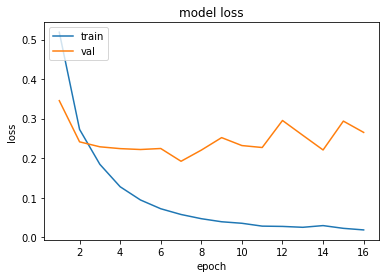

In [ ]:
epochs = range(1, len(history.history['accuracy']) + 1)
plt.plot(epochs, history.history['loss'])
plt.plot(epochs, history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

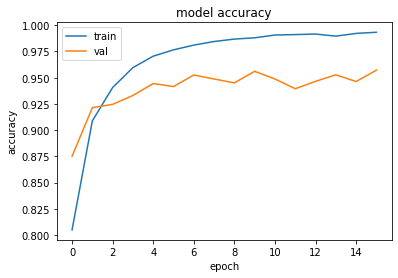

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')

In [ ]:
results = model.evaluate(test_X, test_y, batch_size=1024)
print("test loss, test acc: ", results)

8/8 [==============================] - 24s 2s/step - loss: 0.2345 - accuracy: 0.9589
test loss, test acc:  [0.23445068299770355, 0.958855152130127]
